In [ ]:
#映画レビュー文から、そのレビューがポジティブかネガティブかを判定する二値分類モデル
#データセット：Keras付属の IMDB データセット（25,000 train / 25,000 test）

#前処理：

#頻度上位 10,000語のみ使用

#長さ 200 でパディング

#モデル：

#Embedding → 双方向LSTM → Dense → 出力(sigmoid)

#評価指標：

#accuracy（合格ライン 50%以上）

#classification_report（precision / recall / f1）



In [13]:
# 必要なライブラリのimport
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GlobalAveragePooling1D
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import classification_report

# 乱数シード（再現性確保のため）
np.random.seed(0)
tf.random.set_seed(0)


In [14]:
# 使用する語彙数（頻度上位 num_words 個だけ使う）
num_words = 10000

# IMDBデータセットの読み込み（train: 25,000件, test: 25,000件）
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

# シーケンス長を揃えるためにパディング
maxlen = 200  # 各レビューの最大長（長すぎるものはカット、短いものは0埋め）

X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad  = pad_sequences(X_test,  maxlen=maxlen)

print("X_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape :", X_test_pad.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train shape: (25000,)
X_test shape : (25000,)
y_train shape: (25000,)
y_test shape : (25000,)
X_train_pad shape: (25000, 200)
X_test_pad shape : (25000, 200)


In [15]:
from sklearn.model_selection import train_test_split

X_train_pad, X_valid_pad, y_train, y_valid = train_test_split(
    X_train_pad, y_train, test_size=0.2, random_state=0
)

print("X_train_pad:", X_train_pad.shape)
print("X_valid_pad:", X_valid_pad.shape)
print("y_train    :", y_train.shape)
print("y_valid    :", y_valid.shape)

X_train_pad: (20000, 200)
X_valid_pad: (5000, 200)
y_train    : (20000,)
y_valid    : (5000,)


In [16]:
model = Sequential()

# Embedding層：単語ID → ベクトル表現
model.add(Embedding(input_dim=num_words, output_dim=64, input_length=maxlen))

# 双方向LSTM（精度を出しやすい構成）
model.add(Bidirectional(LSTM(64)))

# 全結合層
model.add(Dense(64, activation="relu"))

# 出力層（2値分類なのでユニット1、sigmoid）
model.add(Dense(1, activation="sigmoid"))

# コンパイル
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\chika\Downloads\aidev\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
import time
start = time.time()

history = model.fit(
    X_train_pad, y_train,
    epochs=5,            # 時間がきつければ 3 くらいでもOK
    batch_size=128,
    validation_data=(X_valid_pad, y_valid),
    verbose=1
)

end = time.time()
print("学習時間:", end - start, "秒")


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 368ms/step - accuracy: 0.7655 - loss: 0.4664 - val_accuracy: 0.8668 - val_loss: 0.3351
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 321ms/step - accuracy: 0.8992 - loss: 0.2570 - val_accuracy: 0.8740 - val_loss: 0.3341
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.9261 - loss: 0.1998 - val_accuracy: 0.8770 - val_loss: 0.3391
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 277ms/step - accuracy: 0.9340 - loss: 0.1769 - val_accuracy: 0.8324 - val_loss: 0.4104
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 297ms/step - accuracy: 0.9409 - loss: 0.1577 - val_accuracy: 0.8522 - val_loss: 0.3679
学習時間: 269.6221992969513 秒


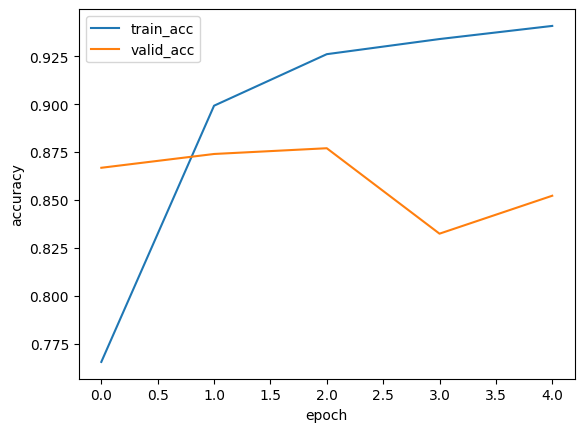

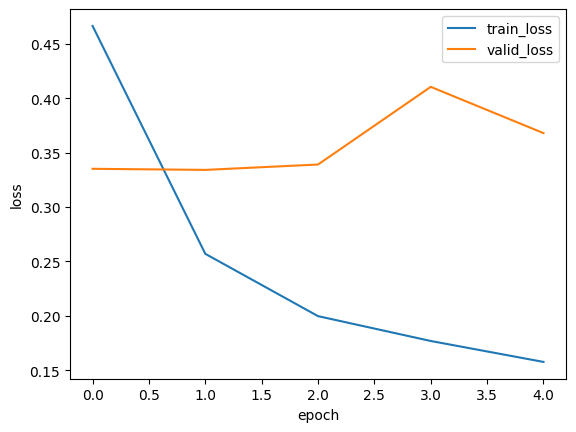

In [19]:
import matplotlib.pyplot as plt

# accuracy
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="valid_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

# loss
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="valid_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.8497200012207031


In [21]:
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)

print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     12500
           1       0.82      0.90      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

